In [ ]:
# we will study the hyperparamter tuning of fully connected scatternet

# first find optimal number of layers and neuron numbers
# second optimize the batch size and number of epochs for the best learned architecture


### Loading the dataset here

In [1]:
import numpy as np

import h5py
from sklearn.model_selection import train_test_split

#now load this dataset 
h5f = h5py.File('./datasets/s8_sio2tio2_v2.h5','r')
X = h5f['sizes'][:]
Y = h5f['spectrum'][:]

#get the ranges of the loaded data
num_layers = X.shape[1]
num_lpoints = Y.shape[1]
size_max = np.amax(X)
size_min = np.amin(X)
size_av = 0.5*(size_max + size_min)

#this information is not given in the dataset
lam_min = 300
lam_max = 1200
lams = np.linspace(lam_min, lam_max, num_lpoints)

#create a train - test split of the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# normalize inputs 
x_train = (x_train - 50)/20 
x_test = (x_test - 50)/20 

print("Dataset has been loaded")
print("x-train", x_train.shape)
print("x-test ", x_test.shape)
print("y-train", y_train.shape)
print("y-test ", y_test.shape)

/home/hegder/anaconda3/envs/deep/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hegder/anaconda3/envs/deep/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hegder/anaconda3/envs/deep/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Dataset has been loaded
x-train (60000, 8)
x-test  (40000, 8)
y-train (60000, 256)
y-test  (40000, 256)


### create models here

In [6]:
import scnets as scn
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#define and visualize the model here
#model = scn.fullycon(num_layers, num_lpoints, 4, 500, 2)

model = scn.conv1dmodel(8, 256, 3)
model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))


/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Dense)                (None, 256)               2304      
_________________________________________________________________
activation_58 (Activation)   (None, 256)               0         
_________________________________________________________________
Reshape1 (Reshape)           (None, 4, 64)             0         
_________________________________________________________________
Up1 (UpSampling1D)           (None, 8, 64)             0         
_________________________________________________________________
Conv1 (Conv1D)               (None, 8, 64)             12352     
_________________________________________________________________
activation_59 (Activation)   (None, 8, 64)             0         
_________________________________________________________________
Conv2 (Conv1D)               (None, 8, 32)             6176      
__________

In [7]:
x_t, x_v, y_t, y_v = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
history = model.fit(x_t, y_t,
                    batch_size=32,
                    epochs=500, 
                    verbose=1,
                    validation_data=(x_v, y_v))


Train on 48000 samples, validate on 12000 samples
Epoch 1/500
 2304/48000 [>.............................] - ETA: 3s - loss: 3963.3802 - acc: 0.0065 - calc_mre_K: 48.3811 

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.03125). Is this intended?
  force_init=force_init)


48000/48000 [==============================] - 4s 90us/step - loss: 706.1956 - acc: 0.0685 - calc_mre_K: 8.6206 - val_loss: 287.1653 - val_acc: 0.1354 - val_calc_mre_K: 3.5054
Epoch 2/500
48000/48000 [==============================] - 4s 88us/step - loss: 240.4728 - acc: 0.2206 - calc_mre_K: 2.9355 - val_loss: 235.9114 - val_acc: 0.2408 - val_calc_mre_K: 2.8798
Epoch 3/500
48000/48000 [==============================] - 4s 88us/step - loss: 199.6521 - acc: 0.2823 - calc_mre_K: 2.4372 - val_loss: 207.5411 - val_acc: 0.3072 - val_calc_mre_K: 2.5335
Epoch 4/500
48000/48000 [==============================] - 4s 84us/step - loss: 183.1636 - acc: 0.3334 - calc_mre_K: 2.2359 - val_loss: 175.4547 - val_acc: 0.3445 - val_calc_mre_K: 2.1418
Epoch 5/500
48000/48000 [==============================] - 4s 92us/step - loss: 173.5258 - acc: 0.3634 - calc_mre_K: 2.1182 - val_loss: 166.9731 - val_acc: 0.3980 - val_calc_mre_K: 2.0382
Epoch 6/500
48000/48000 [==============================] - 4s 89us/step 

48000/48000 [==============================] - 4s 92us/step - loss: 101.9847 - acc: 0.4641 - calc_mre_K: 1.2449 - val_loss: 98.6102 - val_acc: 0.4888 - val_calc_mre_K: 1.2037
Epoch 45/500
48000/48000 [==============================] - 4s 91us/step - loss: 102.1112 - acc: 0.4599 - calc_mre_K: 1.2465 - val_loss: 105.3515 - val_acc: 0.4853 - val_calc_mre_K: 1.2860
Epoch 46/500
48000/48000 [==============================] - 4s 92us/step - loss: 101.5537 - acc: 0.4636 - calc_mre_K: 1.2397 - val_loss: 97.7168 - val_acc: 0.4669 - val_calc_mre_K: 1.1928
Epoch 47/500
48000/48000 [==============================] - 4s 91us/step - loss: 100.2124 - acc: 0.4625 - calc_mre_K: 1.2233 - val_loss: 97.1910 - val_acc: 0.4419 - val_calc_mre_K: 1.1864
Epoch 48/500
48000/48000 [==============================] - 4s 92us/step - loss: 100.3890 - acc: 0.4642 - calc_mre_K: 1.2255 - val_loss: 97.9009 - val_acc: 0.4770 - val_calc_mre_K: 1.1951
Epoch 49/500
48000/48000 [==============================] - 5s 95us/step

Epoch 88/500
48000/48000 [==============================] - 4s 92us/step - loss: 86.1989 - acc: 0.4939 - calc_mre_K: 1.0522 - val_loss: 84.0063 - val_acc: 0.4600 - val_calc_mre_K: 1.0255
Epoch 89/500
48000/48000 [==============================] - 4s 93us/step - loss: 85.4407 - acc: 0.4970 - calc_mre_K: 1.0430 - val_loss: 85.9898 - val_acc: 0.4267 - val_calc_mre_K: 1.0497
Epoch 90/500
48000/48000 [==============================] - 5s 94us/step - loss: 85.4680 - acc: 0.4950 - calc_mre_K: 1.0433 - val_loss: 90.5349 - val_acc: 0.4725 - val_calc_mre_K: 1.1052
Epoch 91/500
48000/48000 [==============================] - 5s 95us/step - loss: 85.0812 - acc: 0.4954 - calc_mre_K: 1.0386 - val_loss: 85.1947 - val_acc: 0.4964 - val_calc_mre_K: 1.0400
Epoch 92/500
48000/48000 [==============================] - 5s 94us/step - loss: 84.6561 - acc: 0.4926 - calc_mre_K: 1.0334 - val_loss: 84.5826 - val_acc: 0.4935 - val_calc_mre_K: 1.0325
Epoch 93/500
48000/48000 [==============================] - 5s 94

Epoch 132/500
48000/48000 [==============================] - 4s 91us/step - loss: 78.4453 - acc: 0.5131 - calc_mre_K: 0.9576 - val_loss: 83.8662 - val_acc: 0.4527 - val_calc_mre_K: 1.0238
Epoch 133/500
48000/48000 [==============================] - 4s 90us/step - loss: 78.0065 - acc: 0.5138 - calc_mre_K: 0.9522 - val_loss: 75.2619 - val_acc: 0.4985 - val_calc_mre_K: 0.9187
Epoch 134/500
48000/48000 [==============================] - 4s 89us/step - loss: 77.8759 - acc: 0.5075 - calc_mre_K: 0.9506 - val_loss: 78.7407 - val_acc: 0.4856 - val_calc_mre_K: 0.9612
Epoch 135/500
48000/48000 [==============================] - 4s 88us/step - loss: 77.9598 - acc: 0.5106 - calc_mre_K: 0.9517 - val_loss: 76.2512 - val_acc: 0.4908 - val_calc_mre_K: 0.9308
Epoch 136/500
48000/48000 [==============================] - 4s 85us/step - loss: 77.2496 - acc: 0.5143 - calc_mre_K: 0.9430 - val_loss: 75.7200 - val_acc: 0.5052 - val_calc_mre_K: 0.9243
Epoch 137/500
48000/48000 [==============================] -

48000/48000 [==============================] - 4s 93us/step - loss: 73.5926 - acc: 0.5109 - calc_mre_K: 0.8983 - val_loss: 71.3396 - val_acc: 0.5327 - val_calc_mre_K: 0.8708
Epoch 176/500
48000/48000 [==============================] - 4s 91us/step - loss: 73.7895 - acc: 0.5119 - calc_mre_K: 0.9008 - val_loss: 72.4405 - val_acc: 0.5372 - val_calc_mre_K: 0.8843
Epoch 177/500
48000/48000 [==============================] - 4s 91us/step - loss: 73.8055 - acc: 0.5103 - calc_mre_K: 0.9009 - val_loss: 73.2557 - val_acc: 0.4870 - val_calc_mre_K: 0.8942
Epoch 178/500
48000/48000 [==============================] - 4s 93us/step - loss: 73.4400 - acc: 0.5076 - calc_mre_K: 0.8965 - val_loss: 73.3387 - val_acc: 0.4958 - val_calc_mre_K: 0.8952
Epoch 179/500
48000/48000 [==============================] - 5s 100us/step - loss: 73.6352 - acc: 0.5100 - calc_mre_K: 0.8989 - val_loss: 72.1694 - val_acc: 0.4588 - val_calc_mre_K: 0.8810
Epoch 180/500
48000/48000 [==============================] - 5s 102us/ste

48000/48000 [==============================] - 5s 98us/step - loss: 70.5734 - acc: 0.5100 - calc_mre_K: 0.8615 - val_loss: 68.4461 - val_acc: 0.5214 - val_calc_mre_K: 0.8355
Epoch 219/500
48000/48000 [==============================] - 5s 100us/step - loss: 70.7573 - acc: 0.5095 - calc_mre_K: 0.8637 - val_loss: 72.1420 - val_acc: 0.4630 - val_calc_mre_K: 0.8806
Epoch 220/500
48000/48000 [==============================] - 5s 105us/step - loss: 70.6328 - acc: 0.5116 - calc_mre_K: 0.8622 - val_loss: 70.0440 - val_acc: 0.5124 - val_calc_mre_K: 0.8550
Epoch 221/500
48000/48000 [==============================] - 4s 91us/step - loss: 70.6602 - acc: 0.5064 - calc_mre_K: 0.8626 - val_loss: 69.4095 - val_acc: 0.5067 - val_calc_mre_K: 0.8473
Epoch 222/500
48000/48000 [==============================] - 4s 89us/step - loss: 70.5734 - acc: 0.5116 - calc_mre_K: 0.8615 - val_loss: 69.9488 - val_acc: 0.4865 - val_calc_mre_K: 0.8539
Epoch 223/500
48000/48000 [==============================] - 4s 90us/ste

Epoch 262/500
48000/48000 [==============================] - 4s 87us/step - loss: 68.2108 - acc: 0.5155 - calc_mre_K: 0.8327 - val_loss: 69.0060 - val_acc: 0.5426 - val_calc_mre_K: 0.8424
Epoch 263/500
48000/48000 [==============================] - 4s 88us/step - loss: 68.2075 - acc: 0.5191 - calc_mre_K: 0.8326 - val_loss: 69.1150 - val_acc: 0.4857 - val_calc_mre_K: 0.8437
Epoch 264/500
48000/48000 [==============================] - 4s 89us/step - loss: 68.1122 - acc: 0.5200 - calc_mre_K: 0.8314 - val_loss: 66.4298 - val_acc: 0.5577 - val_calc_mre_K: 0.8109
Epoch 265/500
48000/48000 [==============================] - 4s 87us/step - loss: 68.1811 - acc: 0.5171 - calc_mre_K: 0.8323 - val_loss: 69.9311 - val_acc: 0.5117 - val_calc_mre_K: 0.8537
Epoch 266/500
48000/48000 [==============================] - 4s 85us/step - loss: 68.1196 - acc: 0.5196 - calc_mre_K: 0.8315 - val_loss: 68.3410 - val_acc: 0.5437 - val_calc_mre_K: 0.8342
Epoch 267/500
48000/48000 [==============================] -

48000/48000 [==============================] - 4s 93us/step - loss: 66.4958 - acc: 0.5235 - calc_mre_K: 0.8117 - val_loss: 65.6847 - val_acc: 0.5271 - val_calc_mre_K: 0.8018
Epoch 306/500
48000/48000 [==============================] - 4s 90us/step - loss: 66.0691 - acc: 0.5272 - calc_mre_K: 0.8065 - val_loss: 66.3119 - val_acc: 0.5327 - val_calc_mre_K: 0.8095
Epoch 307/500
48000/48000 [==============================] - 4s 91us/step - loss: 66.4370 - acc: 0.5255 - calc_mre_K: 0.8110 - val_loss: 66.5318 - val_acc: 0.5268 - val_calc_mre_K: 0.8122
Epoch 308/500
48000/48000 [==============================] - 5s 96us/step - loss: 66.3945 - acc: 0.5220 - calc_mre_K: 0.8105 - val_loss: 65.1229 - val_acc: 0.5443 - val_calc_mre_K: 0.7950
Epoch 309/500
48000/48000 [==============================] - 5s 94us/step - loss: 66.4299 - acc: 0.5270 - calc_mre_K: 0.8109 - val_loss: 66.9808 - val_acc: 0.5443 - val_calc_mre_K: 0.8176
Epoch 310/500
48000/48000 [==============================] - 5s 97us/step 

Epoch 349/500
48000/48000 [==============================] - 4s 87us/step - loss: 65.1191 - acc: 0.5327 - calc_mre_K: 0.7949 - val_loss: 64.7480 - val_acc: 0.5513 - val_calc_mre_K: 0.7904
Epoch 350/500
48000/48000 [==============================] - 4s 88us/step - loss: 65.0700 - acc: 0.5322 - calc_mre_K: 0.7943 - val_loss: 66.3277 - val_acc: 0.5478 - val_calc_mre_K: 0.8097
Epoch 351/500
48000/48000 [==============================] - 4s 87us/step - loss: 64.6839 - acc: 0.5369 - calc_mre_K: 0.7896 - val_loss: 67.0021 - val_acc: 0.4902 - val_calc_mre_K: 0.8179
Epoch 352/500
48000/48000 [==============================] - 4s 87us/step - loss: 65.0273 - acc: 0.5339 - calc_mre_K: 0.7938 - val_loss: 63.4740 - val_acc: 0.5369 - val_calc_mre_K: 0.7748
Epoch 353/500
48000/48000 [==============================] - 5s 98us/step - loss: 64.5409 - acc: 0.5300 - calc_mre_K: 0.7879 - val_loss: 64.0043 - val_acc: 0.5039 - val_calc_mre_K: 0.7813
Epoch 354/500
48000/48000 [==============================] -

48000/48000 [==============================] - 4s 89us/step - loss: 63.9812 - acc: 0.5422 - calc_mre_K: 0.7810 - val_loss: 66.3646 - val_acc: 0.5202 - val_calc_mre_K: 0.8101
Epoch 393/500
48000/48000 [==============================] - 4s 90us/step - loss: 64.0568 - acc: 0.5401 - calc_mre_K: 0.7819 - val_loss: 63.6676 - val_acc: 0.5236 - val_calc_mre_K: 0.7772
Epoch 394/500
48000/48000 [==============================] - 4s 93us/step - loss: 63.8626 - acc: 0.5412 - calc_mre_K: 0.7796 - val_loss: 63.4561 - val_acc: 0.5449 - val_calc_mre_K: 0.7746
Epoch 395/500
48000/48000 [==============================] - 5s 96us/step - loss: 63.7314 - acc: 0.5402 - calc_mre_K: 0.7780 - val_loss: 61.5841 - val_acc: 0.5626 - val_calc_mre_K: 0.7518
Epoch 396/500
48000/48000 [==============================] - 5s 95us/step - loss: 64.0630 - acc: 0.5429 - calc_mre_K: 0.7820 - val_loss: 66.1816 - val_acc: 0.5525 - val_calc_mre_K: 0.8079
Epoch 397/500
48000/48000 [==============================] - 4s 90us/step 

Epoch 436/500
48000/48000 [==============================] - 4s 90us/step - loss: 62.9617 - acc: 0.5484 - calc_mre_K: 0.7686 - val_loss: 63.1879 - val_acc: 0.5417 - val_calc_mre_K: 0.7713
Epoch 437/500
48000/48000 [==============================] - 4s 87us/step - loss: 62.9831 - acc: 0.5476 - calc_mre_K: 0.7688 - val_loss: 64.3852 - val_acc: 0.5223 - val_calc_mre_K: 0.7860
Epoch 438/500
48000/48000 [==============================] - 4s 87us/step - loss: 62.9266 - acc: 0.5473 - calc_mre_K: 0.7681 - val_loss: 61.9711 - val_acc: 0.5267 - val_calc_mre_K: 0.7565
Epoch 439/500
48000/48000 [==============================] - 4s 89us/step - loss: 62.8513 - acc: 0.5517 - calc_mre_K: 0.7672 - val_loss: 62.9398 - val_acc: 0.5841 - val_calc_mre_K: 0.7683
Epoch 440/500
48000/48000 [==============================] - 4s 88us/step - loss: 62.8628 - acc: 0.5469 - calc_mre_K: 0.7674 - val_loss: 67.3535 - val_acc: 0.5613 - val_calc_mre_K: 0.8222
Epoch 441/500
48000/48000 [==============================] -

48000/48000 [==============================] - 4s 91us/step - loss: 61.9569 - acc: 0.5491 - calc_mre_K: 0.7563 - val_loss: 61.9450 - val_acc: 0.5754 - val_calc_mre_K: 0.7562
Epoch 480/500
48000/48000 [==============================] - 4s 91us/step - loss: 62.0828 - acc: 0.5542 - calc_mre_K: 0.7578 - val_loss: 61.5555 - val_acc: 0.5553 - val_calc_mre_K: 0.7514
Epoch 481/500
48000/48000 [==============================] - 5s 95us/step - loss: 62.2471 - acc: 0.5496 - calc_mre_K: 0.7599 - val_loss: 61.6619 - val_acc: 0.5622 - val_calc_mre_K: 0.7527
Epoch 482/500
48000/48000 [==============================] - 5s 94us/step - loss: 61.9085 - acc: 0.5514 - calc_mre_K: 0.7557 - val_loss: 61.6090 - val_acc: 0.5518 - val_calc_mre_K: 0.7521
Epoch 483/500
48000/48000 [==============================] - 4s 92us/step - loss: 61.8669 - acc: 0.5516 - calc_mre_K: 0.7552 - val_loss: 61.4986 - val_acc: 0.5506 - val_calc_mre_K: 0.7507
Epoch 484/500
48000/48000 [==============================] - 4s 91us/step 

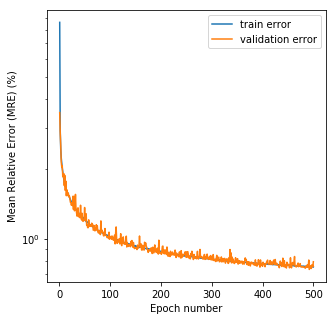

In [8]:
scn.plot_training_history(history, 32*2.56)

In [3]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import scnets as scn
#model = KerasClassifier(build_fn=scn.fullycon, in_size=8, out_size=250, N_gpus=1, epochs=500, verbose=0)

model = KerasClassifier(build_fn=scn.conv1dmodel, 
                        in_size=8, 
                        out_size=256, 
                        ker_size=3,
                        epochs=500, 
                        verbose=0)




param_grid = dict(ker_size=[3,5,7], batch_size=[32,64])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=1)
grid_result = grid.fit(x_train, y_train)




Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

In [4]:
grid_result

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8cb83b3cc0>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ker_size': [3, 5, 7], 'batch_size': [32, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [5]:
grid_result.cv_results_

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/

{'mean_fit_time': array([1236.77363722, 1263.8373781 , 1283.07971772,  617.23694984,
         644.64875857,  630.75466394]),
 'std_fit_time': array([15.23634435,  1.04774932, 70.7173362 , 19.87266061,  3.13235316,
        19.13357172]),
 'mean_score_time': array([1.9509182 , 2.09144211, 2.07234033, 1.05850196, 1.09700545,
        1.07024908]),
 'std_score_time': array([0.09494565, 0.09207867, 0.09335411, 0.04954752, 0.04209056,
        0.05320864]),
 'param_batch_size': masked_array(data=[32, 32, 32, 64, 64, 64],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_ker_size': masked_array(data=[3, 5, 7, 3, 5, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 32, 'ker_size': 3},
  {'batch_size': 32, 'ker_size': 5},
  {'batch_size': 32, 'ker_size': 7},
  {'batch_size': 64, 'ker_size': 3},
  {'batch_size': 64, 'ker_size': 5},

{'mean_fit_time': array([ 893.33654523,  898.53078222, 1119.14394736, 1130.1775128 ,
         956.51246222,  964.45365715, 1209.3984166 , 1582.91039157,
        1394.26560704, 1616.26630108, 1266.47200227, 1116.83488099,
        1205.42738708, 1201.92515103, 1210.92550143]),
 'std_fit_time': array([  3.08891285,   6.81113186, 212.20371026, 238.93357922,
          6.97112622,  18.87349827, 223.00445851,  57.7875855 ,
        100.70476936,  43.95356933, 134.83849082,  11.29690679,
          5.42330543,   6.19267952,   4.92641743]),
 'mean_score_time': array([1.63011034, 1.61093879, 1.66868186, 1.48953597, 1.43644238,
        1.57432818, 1.69542178, 1.78519742, 1.65484571, 1.89959979,
        1.76437203, 1.6481727 , 1.7160941 , 1.75274881, 1.71138732]),
 'std_score_time': array([0.02974069, 0.08114865, 0.04441992, 0.06436249, 0.04163585,
        0.03811946, 0.09529008, 0.0232277 , 0.0417081 , 0.07397102,
        0.14329706, 0.06546494, 0.07330068, 0.05566151, 0.052498  ]),
 'param_N_hidden': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_N_neurons': masked_array(data=[250, 500, 1000, 250, 500, 1000, 250, 500, 1000, 250,
                    500, 1000, 250, 500, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'N_hidden': 1, 'N_neurons': 250},
  {'N_hidden': 1, 'N_neurons': 500},
  {'N_hidden': 1, 'N_neurons': 1000},
  {'N_hidden': 2, 'N_neurons': 250},
  {'N_hidden': 2, 'N_neurons': 500},
  {'N_hidden': 2, 'N_neurons': 1000},
  {'N_hidden': 3, 'N_neurons': 250},
  {'N_hidden': 3, 'N_neurons': 500},
  {'N_hidden': 3, 'N_neurons': 1000},
  {'N_hidden': 4, 'N_neurons': 250},
  {'N_hidden': 4, 'N_neurons': 500},
  {'N_hidden': 4, 'N_neurons': 1000},
  {'N_hidden': 5, 'N_neurons': 250},
  {'N_hidden': 5, 'N_neurons': 500},
  {'N_hidden': 5, 'N_neurons': 1000}],
 'split0_test_score': array([0.00235, 0.00225, 0.0025 , 0.0024 , 0.0026 , 0.0021 , 0.00165,
        0.0023 , 0.00255, 0.00255, 0.0024 , 0.0027 , 0.0021 , 0.00225,
        0.0022 ]),
 'split1_test_score': array([0.0024 , 0.00225, 0.0022 , 0.0022 , 0.00235, 0.0022 , 0.0021 ,
        0.00195, 0.00215, 0.0022 , 0.00185, 0.00195, 0.002  , 0.00195,
        0.0021 ]),
 'split2_test_score': array([0.00255, 0.00315, 0.00275, 0.00295, 0.00355, 0.0032 , 0.00275,
        0.0031 , 0.0028 , 0.00305, 0.00305, 0.00355, 0.00275, 0.00285,
        0.00305]),
 'mean_test_score': array([0.00243333, 0.00255   , 0.00248333, 0.00251667, 0.00283333,
        0.0025    , 0.00216667, 0.00245   , 0.0025    , 0.0026    ,
        0.00243333, 0.00273333, 0.00228333, 0.00235   , 0.00245   ]),
 'std_test_score': array([8.49836586e-05, 4.24264069e-04, 2.24845626e-04, 3.17104960e-04,
        5.16935414e-04, 4.96655481e-04, 4.51540573e-04, 4.81317636e-04,
        2.67706307e-04, 3.48807492e-04, 4.90464632e-04, 6.53622385e-04,
        3.32498956e-04, 3.74165739e-04, 4.26223728e-04]),
 'rank_test_score': array([11,  4,  8,  5,  1,  6, 15,  9,  6,  3, 11,  2, 14, 13,  9],
       dtype=int32),
 'split0_train_score': array([0.00255 , 0.0024  , 0.0023  , 0.00255 , 0.00255 , 0.002375,
        0.002125, 0.002625, 0.0025  , 0.002775, 0.002625, 0.0027  ,
        0.0023  , 0.00245 , 0.002275]),
 'split1_train_score': array([0.002975, 0.0025  , 0.00255 , 0.0028  , 0.0029  , 0.002475,
        0.002575, 0.0027  , 0.002575, 0.002375, 0.002475, 0.002475,
        0.002325, 0.002425, 0.002375]),
 'split2_train_score': array([0.00215 , 0.0022  , 0.00215 , 0.002375, 0.00205 , 0.002175,
        0.00215 , 0.0022  , 0.002   , 0.00235 , 0.00235 , 0.002525,
        0.00215 , 0.002175, 0.002175]),
 'mean_train_score': array([0.00255833, 0.00236667, 0.00233333, 0.002575  , 0.0025    ,
        0.00234167, 0.00228333, 0.00250833, 0.00235833, 0.0025    ,
        0.00248333, 0.00256667, 0.00225833, 0.00235   , 0.002275  ]),
 'std_train_score': array([3.36856382e-04, 1.24721913e-04, 1.64991582e-04, 1.74403746e-04,
        3.48807492e-04, 1.24721913e-04, 2.06491862e-04, 2.20164080e-04,
        2.55223214e-04, 1.94722024e-04, 1.12422813e-04, 9.64653075e-05,
        7.72801541e-05, 1.24163870e-04, 8.16496581e-05])}
        
 
 {'mean_fit_time': array([  685.01906315,  1809.28454868,   336.60541034,   878.23016135]),
 'mean_score_time': array([ 1.38006322,  1.27389534,  0.6934317 ,  0.69225407]),
 'mean_test_score': array([ 0.00241667,  0.00251667,  0.00243333,  0.00261667]),
 'mean_train_score': array([ 0.00245833,  0.00236667,  0.00248333,  0.00253333]),
 'param_batch_size': masked_array(data = [32 32 64 64],
              mask = [False False False False],
        fill_value = ?),
 'param_epochs': masked_array(data = [200 500 200 500],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'batch_size': 32, 'epochs': 200},
  {'batch_size': 32, 'epochs': 500},
  {'batch_size': 64, 'epochs': 200},
  {'batch_size': 64, 'epochs': 500}),
 'rank_test_score': array([4, 2, 3, 1], dtype=int32),
 'split0_test_score': array([ 0.0021 ,  0.00225,  0.00215,  0.00225]),
 'split0_train_score': array([ 0.00235 ,  0.0023  ,  0.002625,  0.002575]),
 'split1_test_score': array([ 0.00225,  0.00225,  0.00215,  0.00235]),
 'split1_train_score': array([ 0.002675,  0.002725,  0.002675,  0.002825]),
 'split2_test_score': array([ 0.0029 ,  0.00305,  0.003  ,  0.00325]),
 'split2_train_score': array([ 0.00235 ,  0.002075,  0.00215 ,  0.0022  ]),
 'std_fit_time': array([  27.85582158,  121.41697465,    1.58335506,   11.64839192]),
 'std_score_time': array([ 0.01602076,  0.06291871,  0.03384719,  0.05541393]),
 'std_test_score': array([ 0.00034721,  0.00037712,  0.00040069,  0.00044969]),
 'std_train_score': array([ 0.00015321,  0.00026952,  0.00023658,  0.00025685])}
        
        
        'mean_fit_time': array([1236.77363722, 1263.8373781 , 1283.07971772,  617.23694984,
         644.64875857,  630.75466394]),
 'std_fit_time': array([15.23634435,  1.04774932, 70.7173362 , 19.87266061,  3.13235316,
        19.13357172]),
 'mean_score_time': array([1.9509182 , 2.09144211, 2.07234033, 1.05850196, 1.09700545,
        1.07024908]),
 'std_score_time': array([0.09494565, 0.09207867, 0.09335411, 0.04954752, 0.04209056,
        0.05320864]),
 'param_batch_size': masked_array(data=[32, 32, 32, 64, 64, 64],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_ker_size': masked_array(data=[3, 5, 7, 3, 5, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 32, 'ker_size': 3},
  {'batch_size': 32, 'ker_size': 5},
  {'batch_size': 32, 'ker_size': 7},
  {'batch_size': 64, 'ker_size': 3},
  {'batch_size': 64, 'ker_size': 5},
  {'batch_size': 64, 'ker_size': 7}],
 'split0_test_score': array([0.00225, 0.0017 , 0.0027 , 0.00225, 0.00205, 0.0024 ]),
 'split1_test_score': array([0.0021 , 0.0023 , 0.0023 , 0.0019 , 0.002  , 0.00165]),
 'split2_test_score': array([0.00325, 0.00215, 0.0021 , 0.00245, 0.0024 , 0.0024 ]),
 'mean_test_score': array([0.00253333, 0.00205   , 0.00236667, 0.0022    , 0.00215   ,
        0.00215   ]),
 'std_test_score': array([0.00051045, 0.00025495, 0.00024944, 0.0002273 , 0.00017795,
        0.00035355]),
 'rank_test_score': array([1, 6, 2, 3, 4, 4], dtype=int32),
 'split0_train_score': array([0.001875, 0.001625, 0.002525, 0.002175, 0.0019  , 0.002275]),
 'split1_train_score': array([0.0027  , 0.00275 , 0.00245 , 0.0022  , 0.002125, 0.002475]),
 'split2_train_score': array([0.0024  , 0.00205 , 0.0019  , 0.0021  , 0.00225 , 0.001775]),
 'mean_train_score': array([0.002325  , 0.00214167, 0.00229167, 0.00215833, 0.00209167,
        0.002175  ]),
 'std_train_score': array([3.40954542e-04, 4.63830668e-04, 2.78637558e-04, 4.24918293e-05,
        1.44817893e-04, 2.94392029e-04])}
        